In [191]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [193]:
data.shape

(891, 12)

## Handling Nan Features

In [194]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [195]:
# Taking care of Age
median = data['Age'].median()
data['Age'].fillna(value=median, inplace=True)
# data['Age'] = data['Age'].fillna(value=median) # Logically the same thing as above

# Taking care of Cabin
data['Cabin'].fillna(value='Misc', inplace=True)

data.dropna(inplace=True)

In [196]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# EDA (Exploratory Data Analysis)

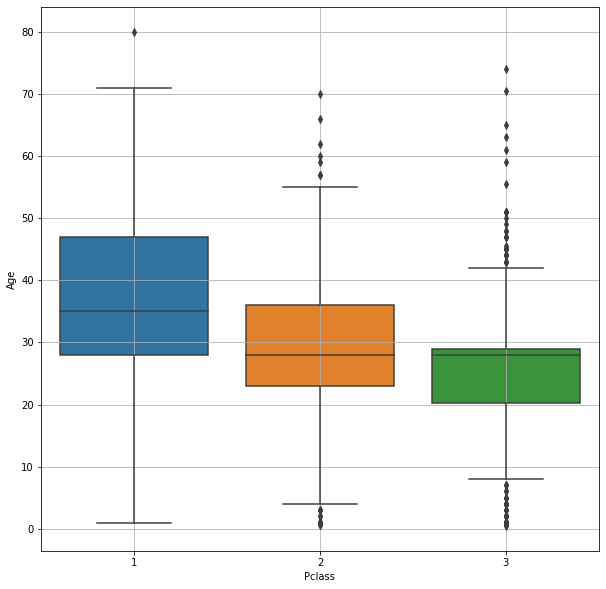

In [197]:
plt.figure(figsize=(10, 10)) # Increasing the size of plot
sns.boxplot(x='Pclass', y='Age', data=data)
plt.grid(1) # Enabling grids

There is a lot of EDA we can do..!

## Feature Engineering+Preprocessing

In [198]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Misc,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Misc,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Misc,S


#### Droping Kachra features

In [199]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [200]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Misc,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Misc,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Misc,S


#### Label Encoding

In [201]:
# Converting to one-hot array
embarked_onehot = pd.get_dummies(data.Embarked)
sex_onehot = pd.get_dummies(data.Sex, drop_first=True)

# Concatinating to the original Dataframe
data = pd.concat([data, embarked_onehot, sex_onehot], axis=1)

# Dropping the parent features
data.drop(columns=['Sex', 'Embarked'], inplace=True)

In [202]:
# Converting to Labels
le = LabelEncoder()
data.Cabin = le.fit_transform(data.Cabin)

In [203]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,C,Q,S,male
0,0,3,22.0,1,0,7.2500,145,0,0,1,1
1,1,1,38.0,1,0,71.2833,80,1,0,0,0
2,1,3,26.0,0,0,7.9250,145,0,0,1,0
3,1,1,35.0,1,0,53.1000,54,0,0,1,0
4,0,3,35.0,0,0,8.0500,145,0,0,1,1


### Normalization

In [204]:
scaler = MinMaxScaler()

data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [205]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,C,Q,S,male
0,0,3,0.271174,1,0,0.014151,145,0,0,1,1
1,1,1,0.472229,1,0,0.139136,80,1,0,0,0
2,1,3,0.321438,0,0,0.015469,145,0,0,1,0
3,1,1,0.434531,1,0,0.103644,54,0,0,1,0
4,0,3,0.434531,0,0,0.015713,145,0,0,1,1


# Predictive Modelling

In [206]:
features = data.drop(columns=['Survived', 'Cabin'])
label    = data['Survived']

# Split the dataset into train and test sets

X_train, X_test, y_train, y_test =  train_test_split(features, label, test_size=0.2, random_state=1)

1. Decision Trees Classifier
2. Random Forest Classifier
3. Logistic Regression

#### Decision Trees

In [207]:
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_score(y_test, predictions) *100

80.33707865168539

#### Random Forest Classification

In [208]:
model = RandomForestClassifier(random_state=11)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_score(y_test, predictions) *100

82.02247191011236

#### Logistic Regression

In [209]:
model = LogisticRegression(random_state=12)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy_score(y_test, predictions) *100

83.70786516853933